<a href="https://colab.research.google.com/github/paolagaro/ML-Final-Project-MENTAL-HEALTH-/blob/main/ML_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

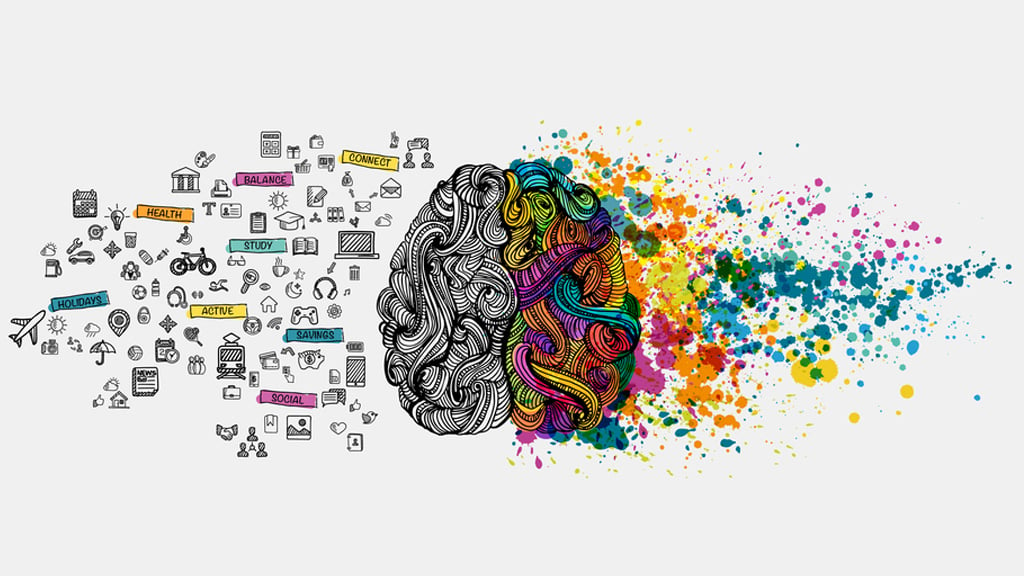

**MENTAL HEALTH**:

Base on **National Institute of Mental Health**, Mental health includes emotional, psychological, and social well-being. It is more than the absence of a mental illness—it’s essential to your overall health and quality of life.

Mental health is a basic factor in society, it is an extremely important part of the life of a human being and on which their success and well-being are based on and those around them.To this day mental illnesses are a topic that in many countries and societies, is taboo to talk about it.


**MENTAL HEALTH DATASET**

To obtain the data from this data set they used a survey to measure mental illness or illnesses. Based on information from the website from which this data set was taken, the survey was conducted on people with symptoms related to a medical diagnosis manual and not necessarily by a health care worker or prediagnosed patients.

One of the advantages of a survey data in mental health it is done base on Questions structured so that they do not show the purpose of the interview but where the answers will lead to a conclusion. This helps to make the data more real and also to reach a broader population, including people who would not normally obtain a diagnosis due to lack of knowledge or fear. On the other hand, one of the disadvantages of this type of data is an erroneous or inaccurate information could be presented due to the lack of honesty on the part of the interviewee answered.

Data set sources: https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset/data

**Let's start with Exploratory Data Analysis (EDA) to know our data**

In [82]:
import pandas as pd
df = pd.read_csv('mental_health.csv')
df.head()


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [3]:
df.shape

(292364, 17)

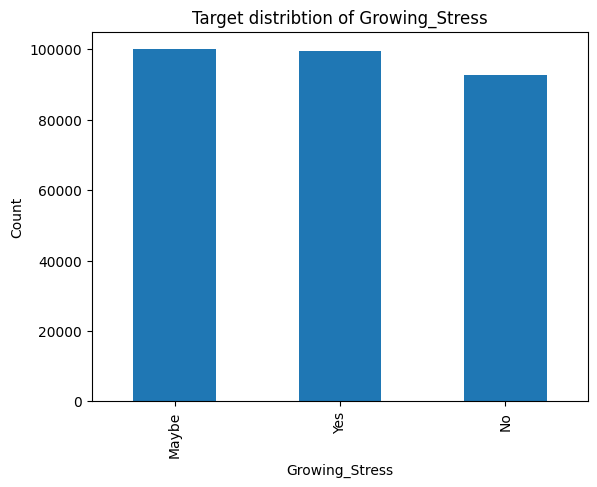

In [58]:
import matplotlib.pyplot as plt

value_counts = df['Growing_Stress'].value_counts()

value_counts.plot(kind='bar', title='Target distribtion of Growing_Stress')
plt.xlabel('Growing_Stress')
plt.ylabel('Count')
plt.show()

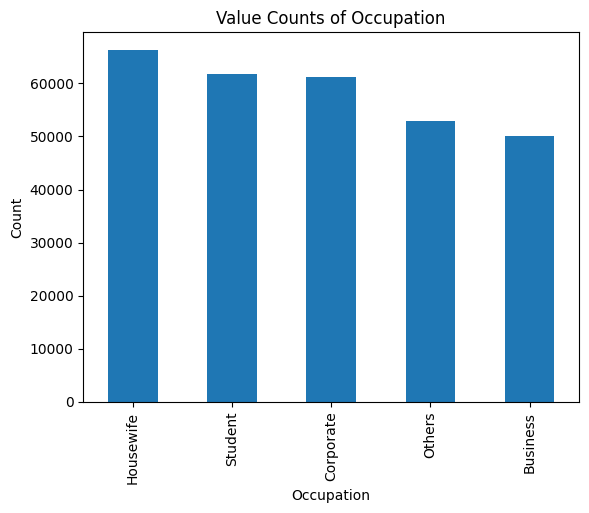

In [57]:
import matplotlib.pyplot as plt

value_counts = df['Occupation'].value_counts()

value_counts.plot(kind='bar', title='Value Counts of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

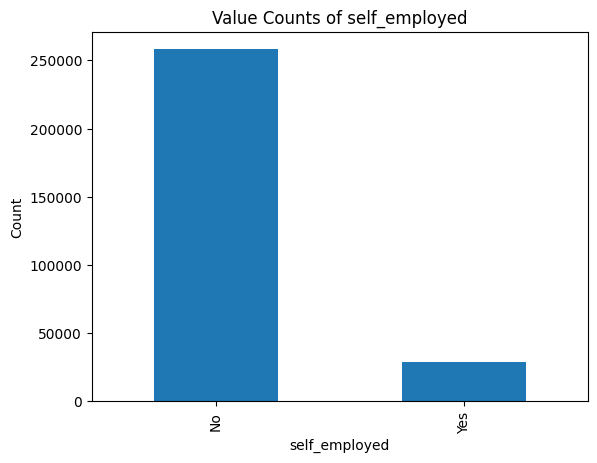

In [56]:
import matplotlib.pyplot as plt

value_counts = df['self_employed'].value_counts()

value_counts.plot(kind='bar', title='Value Counts of self_employed')
plt.xlabel('self_employed')
plt.ylabel('Count')
plt.show()

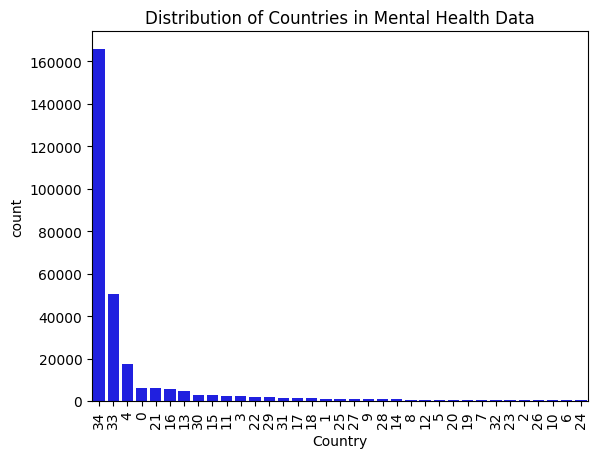

In [27]:
import matplotlib.pyplot as plt
sns.countplot(x = 'Country',data= df, order= df['Country'].value_counts().index, color='blue')
plt.xticks(rotation=90)
plt.title('Distribution of Countries in Mental Health Data')
plt.show()

In [49]:
occupation_stress= df.groupby('Occupation')['Growing_Stress'].value_counts().unstack()
occupation_stress


Growing_Stress,Maybe,No,Yes
Occupation,,,
Business,17049,14216,18884
Corporate,17049,20255,23925
Housewife,24167,22584,19600
Others,18400,19015,15426
Student,23320,16656,21818


**Decision Tree Calssifiier**


The algorithm that I decided to use for this code is Decision Tree Calssifiier for several reasons, Mainly we will use decision tree for the type of data we are using, this data set contains many categorical features such as 'Gender', 'Occupation', 'social weakness' and among others, using this algorithm that makes possible the conversion of categorical data to numerical data we will use Lebel Encoding to make the conversion of the features, in addition to the fact that decision tree is well-suited for categorical handeling data therefore it will work well with this type of dara.

Decision Tree will also help us understand how the model makes its predictions and we can visualize it to better understanding, in Mental Health is important to know or understand the reasons for which the predictions are based.

In [63]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('mental_health.csv')

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)


label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Timestamp'] = label_encoder.fit_transform(df['Timestamp'])
df['Country'] = label_encoder.fit_transform(df['Country'])
df['Occupation'] = label_encoder.fit_transform(df['Occupation'])
df['self_employed'] = label_encoder.fit_transform(df['self_employed'])
df['family_history'] = label_encoder.fit_transform(df['family_history'])
df['treatment'] = label_encoder.fit_transform(df['treatment'])
df['Days_Indoors'] = label_encoder.fit_transform(df['Days_Indoors'])
df['Growing_Stress'] = label_encoder.fit_transform(df['Growing_Stress'])
df['Changes_Habits'] = label_encoder.fit_transform(df['Changes_Habits'])
df['Mental_Health_History'] = label_encoder.fit_transform(df['Mental_Health_History'])
df['Mood_Swings'] = label_encoder.fit_transform(df['Mood_Swings'])
df['Coping_Struggles'] = label_encoder.fit_transform(df['Coping_Struggles'])
df['Work_Interest'] = label_encoder.fit_transform(df['Gender'])
df['mental_health_interview'] = label_encoder.fit_transform(df['Gender'])
df['care_options'] = label_encoder.fit_transform(df['care_options'])
df['Social_Weakness'] = label_encoder.fit_transform(df['Social_Weakness'])


X = df.drop('Occupation', axis = 1)
y = df['Growing_Stress']

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))
print(f"Accuracy_score")

accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy_score}")

baseline_accuracy = y_test.value_counts().max() / len(y_test)
print(f"Baseline Accuracy: {baseline_accuracy}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19557
           1       1.00      1.00      1.00     18115
           2       1.00      1.00      1.00     19300

    accuracy                           1.00     56972
   macro avg       1.00      1.00      1.00     56972
weighted avg       1.00      1.00      1.00     56972

Accuracy_score
Accuracy score: 1.0
Baseline Accuracy: 0.3432738889278944


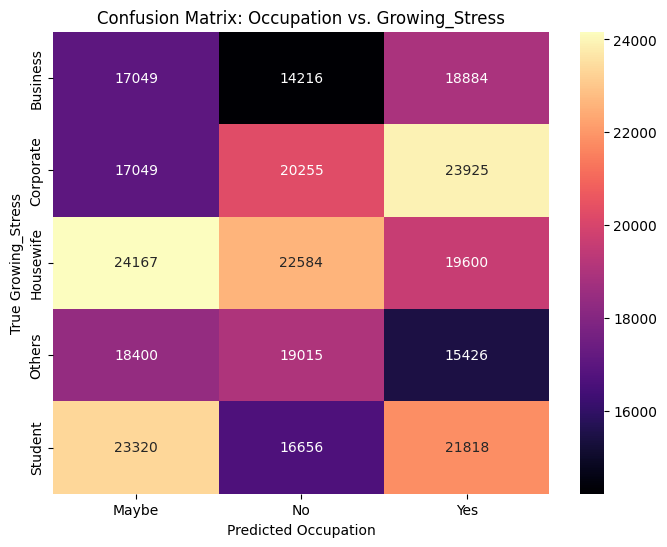

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(occupation_stress, annot=True, fmt='d', cmap="magma")
plt.xlabel('Predicted Occupation')
plt.ylabel('True Growing_Stress')
plt.title('Confusion Matrix: Occupation vs. Growing_Stress')
plt.show()

**Gradient Boosting Classifier**.

This maching learning technique used for classification and regression can handle categorical and numerical data for this reason I would like to experiment with a Gradient Boosting Classifier model to try to potentially improve the accuracy of prediction.

Before starting my Gradient Boosting Classifier model we are going to analyze the correlation between the different features of my data set with a correlation matrix where we can see and have a better vision and clearer understanding of the correlation between the features to be able to determine the best features for our predict model.



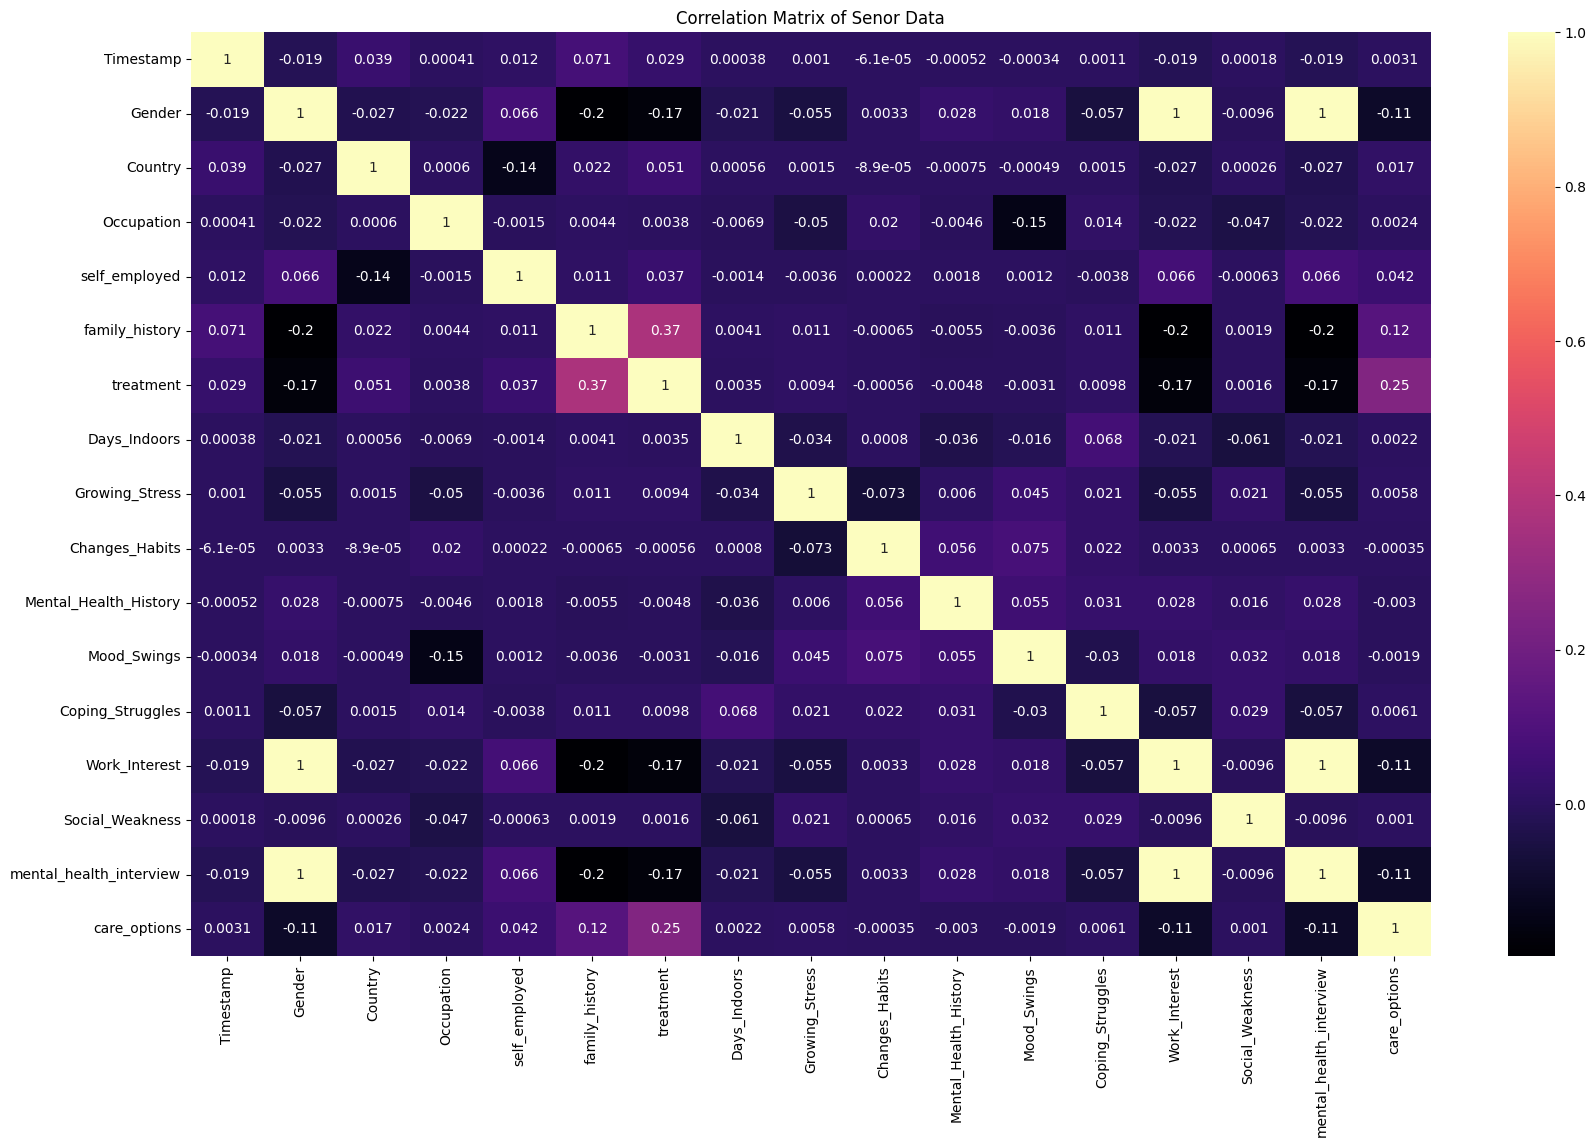

In [65]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix,annot=True, cmap="magma")
plt.title('Correlation Matrix of Senor Data')
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np


X = df.drop(columns=["Occupation"])
y = df["Growing_Stress"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3, random_state=42)


gbc.fit(X_train, y_train)


y_pred = gbc.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


cv_scores = cross_val_score(gbc, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores for each fold: {cv_scores}")
print(f"Mean accuracy across all folds: {np.mean(cv_scores):.2f}")
print(f"Standard deviation of accuracies: {np.std(cv_scores):.2f}")

print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)



Cross-validation scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy across all folds: 1.00
Standard deviation of accuracies: 0.00
Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19508
           1       1.00      1.00      1.00     18068
           2       1.00      1.00      1.00     19396

    accuracy                           1.00     56972
   macro avg       1.00      1.00      1.00     56972
weighted avg       1.00      1.00      1.00     56972



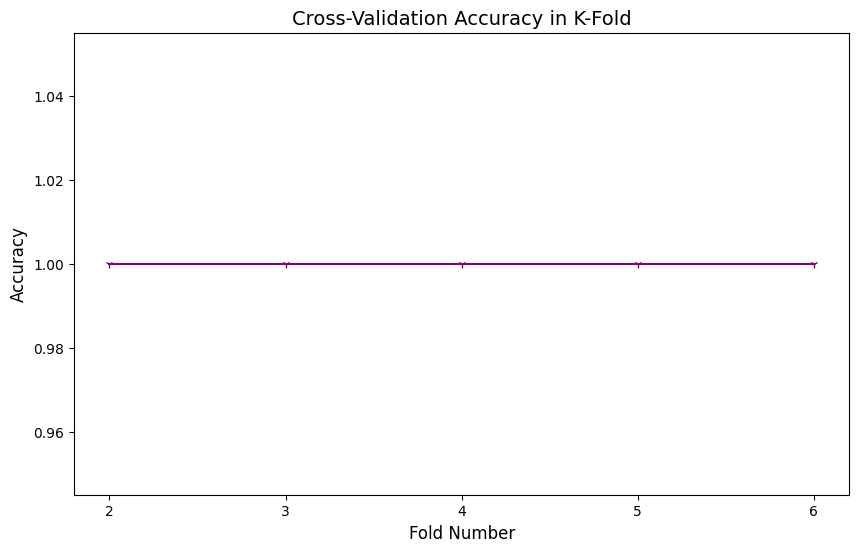

In [81]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(2, len(cv_scores) + 2), cv_scores, marker='1', linestyle='-', color='purple')

plt.title('Cross-Validation Accuracy in K-Fold', fontsize=14)
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(range(2, len(cv_scores) + 2))

plt.show()

**CONCLUSION**

Decision **Tree Classification model** has a currency of 1.0 which indicates that compared to the baseline accuracy which is 0.34 it is quite high, this tells us that possibly 34% of predictions for the model will be correct since our model has learned patterns in data to be able to base its predictions on and not on guess. On the other hand we have the Gradient **Boosting Classifier model** where our accuracy score was a perfect 1 and we can see it in the visualization graph that shows zero variation across folds, which means that our model is most likely to make consistent and dependent predictions for different patients which could indicate a "perfect model". The baseline score (0.34 for Decision Tree Classification) and the standard division (0.00 for Gradient Boosting Classifier) it is telling us that our models would need more data information and a complex structure of the model to make predictions based on this data set. Therefore, my best option to make stress-oriented predictions based on occupations would be the Decision Tree Classification because the perfect score of 1.0 warrants careful review of your data and a pre-processed to avoid data leakage.